In [14]:
import pandas as pd
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [9]:
import pandas as pd



# Find duplicates
duplicates = df.duplicated()
print(duplicates)

# Filter duplicates
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)


0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Length: 1309, dtype: bool
Empty DataFrame
Columns: [pclass, survived, name, sex, age, sibsp, parch, ticket, fare, cabin, embarked, boat, body, home.dest]
Index: []


In [10]:
# Check for missing values
# Count missing values per column
missing_count = df.isnull().sum()
print(missing_count)

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


<Axes: >

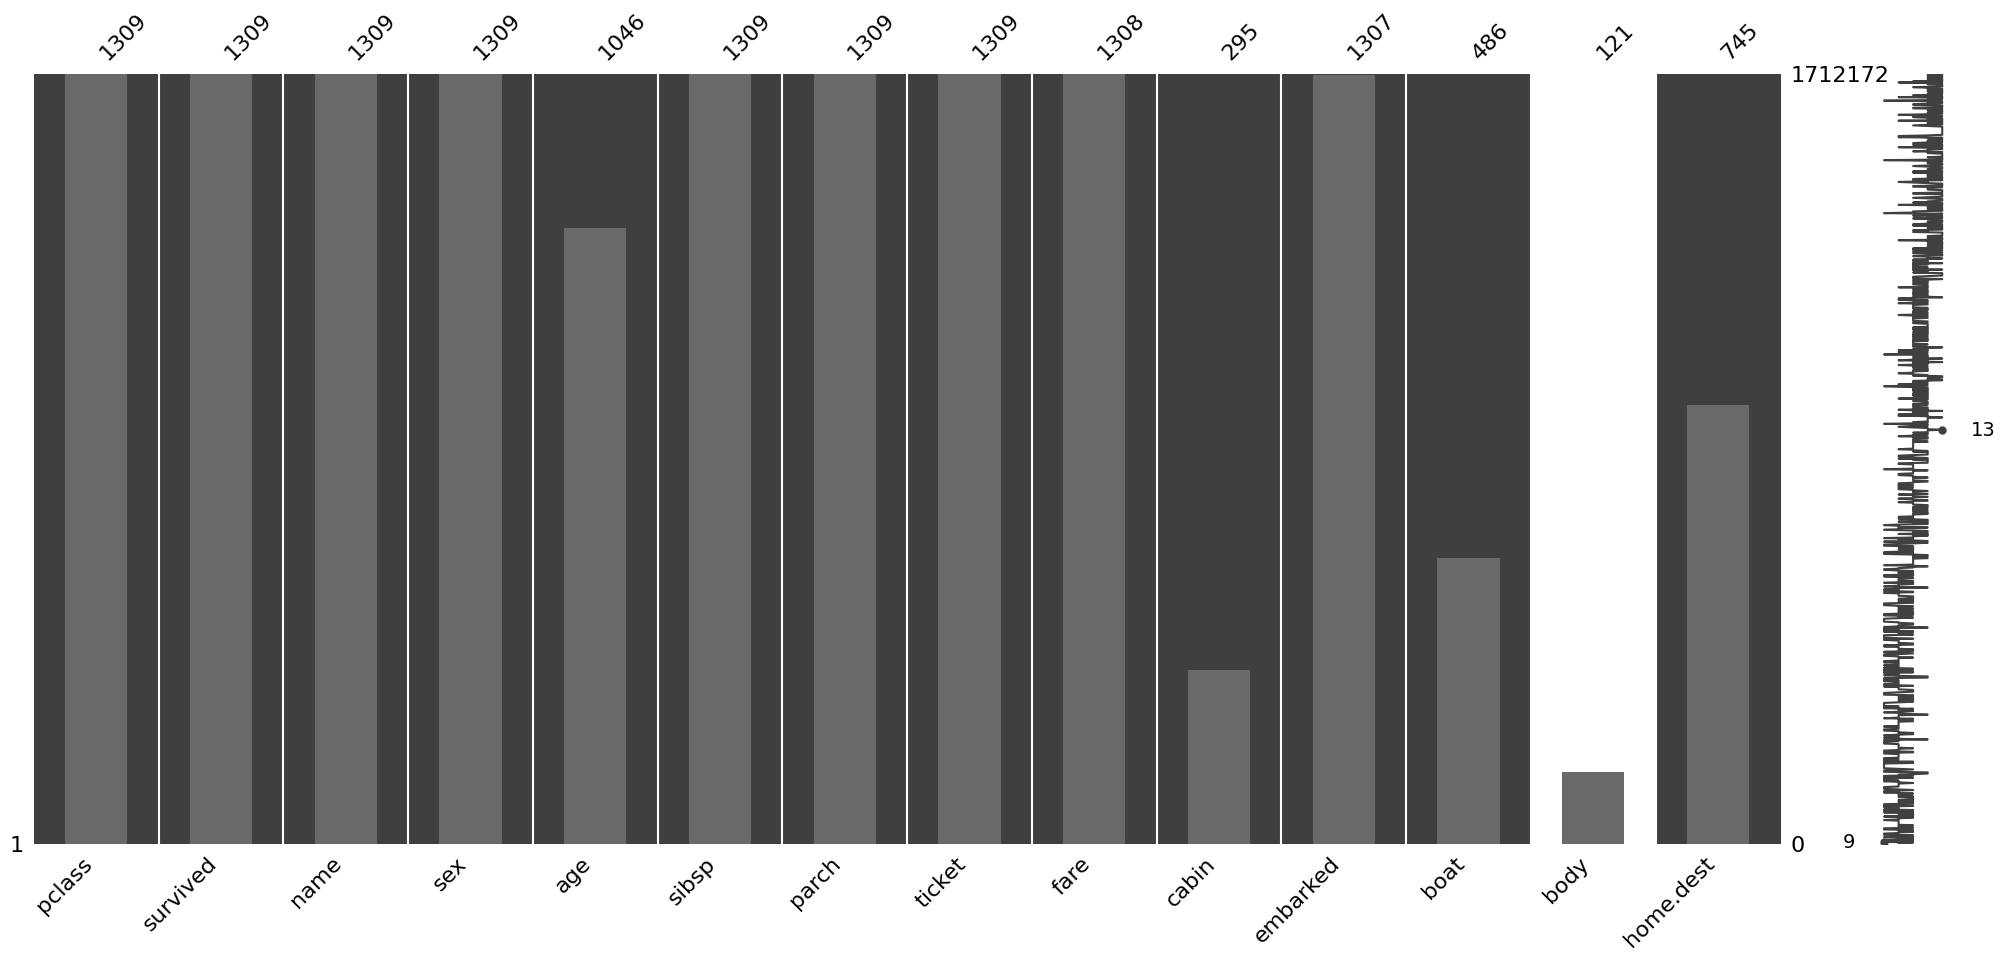

In [11]:
import missingno as msno

# Visualize missing data matrix
msno.matrix(df)

# Visualize missing data as a bar chart
msno.bar(df)

In [16]:
df['age'] = df['age'].fillna(df['age'].mode()[0])
df['cabin'] = df['cabin'].fillna(df['cabin'].mode()[0])
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['boat'] = df['boat'].fillna(df['boat'].mode()[0])
df['body'] = df['body'].fillna(df['body'].mode()[0])
df['home.dest'] = df['home.dest'].fillna(df['home.dest'].mode()[0])
print(df)

      pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex        age  sibsp  parch  ticket      fare        cabin embarked  \
0     female  29.0

<Axes: >

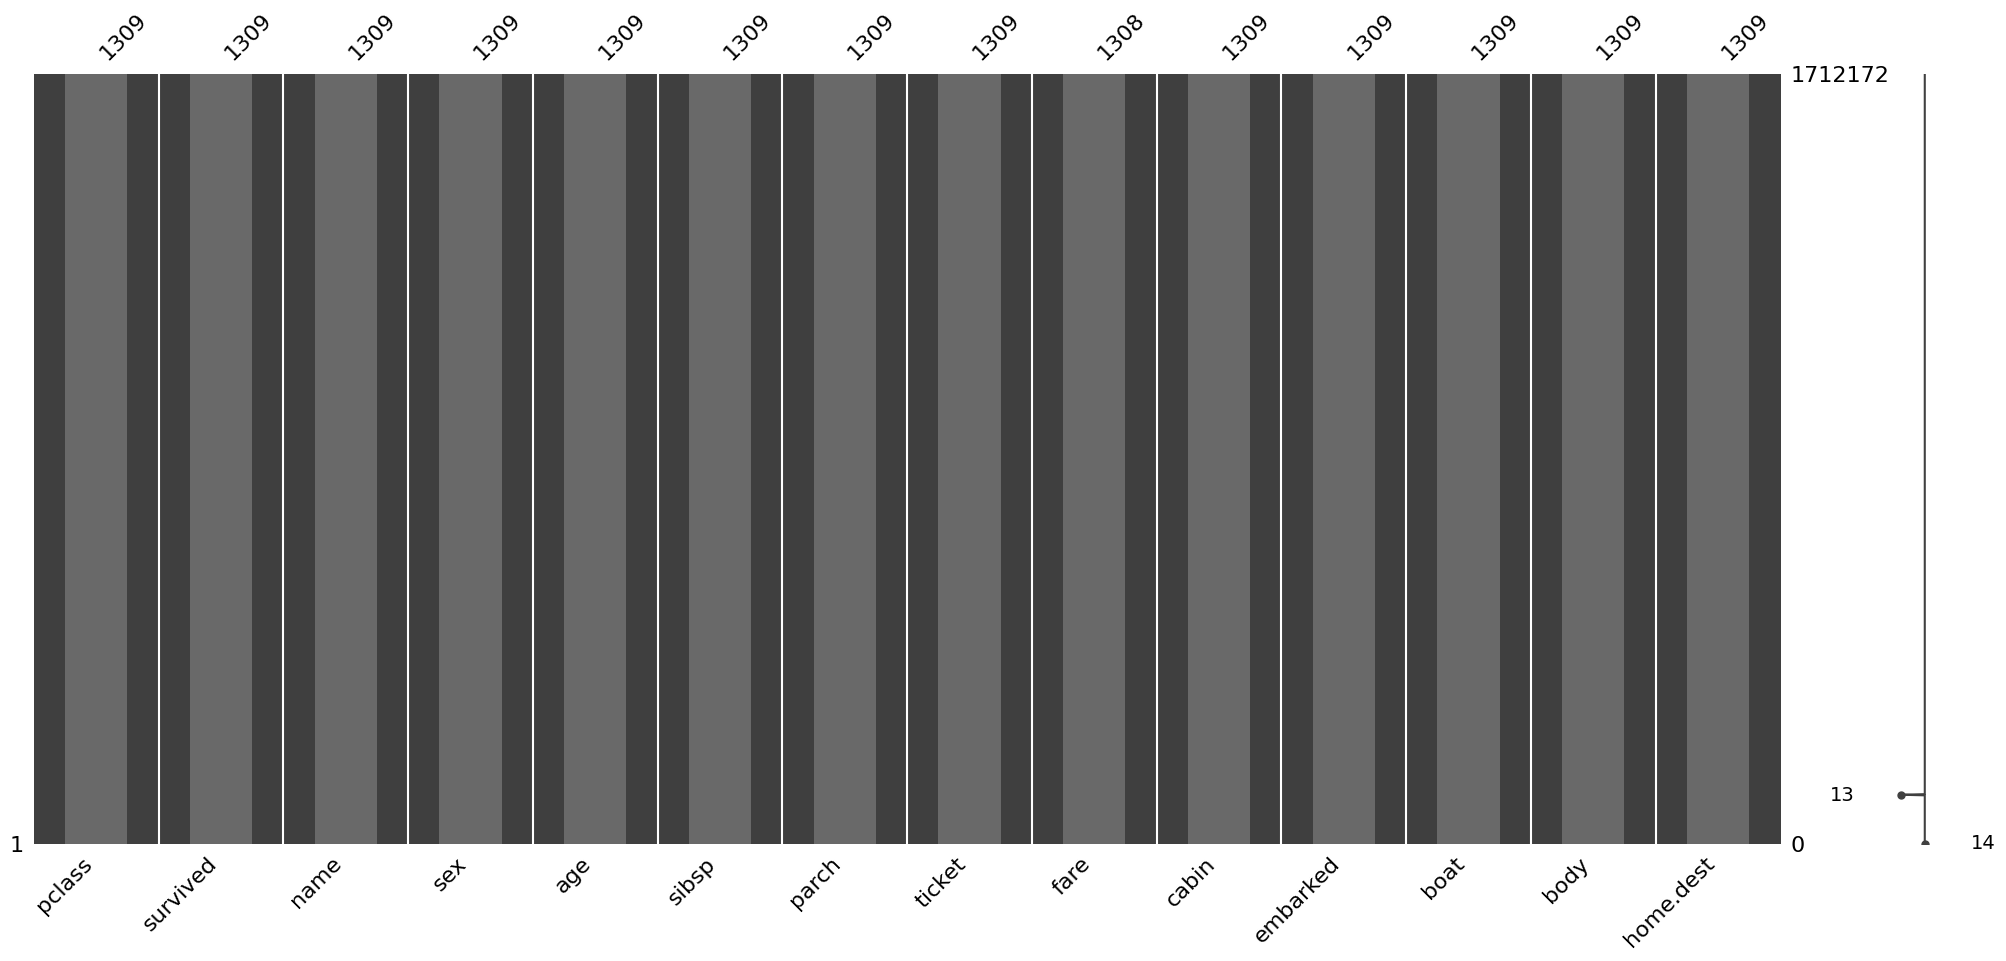

In [17]:
import missingno as msno

# Visualize missing data matrix
msno.matrix(df)

# Visualize missing data as a bar chart
msno.bar(df)

In [21]:
import numpy as np
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate Q1, Q3, and IQR for numeric columns
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers across numeric columns
outliers = numeric_df[((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(outliers)


      pclass  survived    age  sibsp  parch      fare   body
0          1         1  29.00      0      0  211.3375    1.0
1          1         1   0.92      1      2  151.5500    1.0
2          1         0   2.00      1      2  151.5500    1.0
3          1         0  30.00      1      2  151.5500  135.0
4          1         0  25.00      1      2  151.5500    1.0
...      ...       ...    ...    ...    ...       ...    ...
1294       3         0  28.50      0      0   16.1000   14.0
1296       3         0  27.00      0      0    8.6625  131.0
1301       3         0  45.50      0      0    7.2250  312.0
1304       3         0  14.50      1      0   14.4542  328.0
1306       3         0  26.50      0      0    7.2250  304.0

[534 rows x 7 columns]


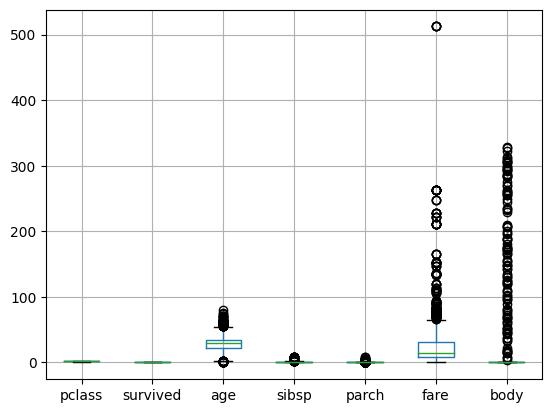

In [22]:
import matplotlib.pyplot as plt

# Boxplot for each numeric column
df.boxplot(column=['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body'])
plt.show()

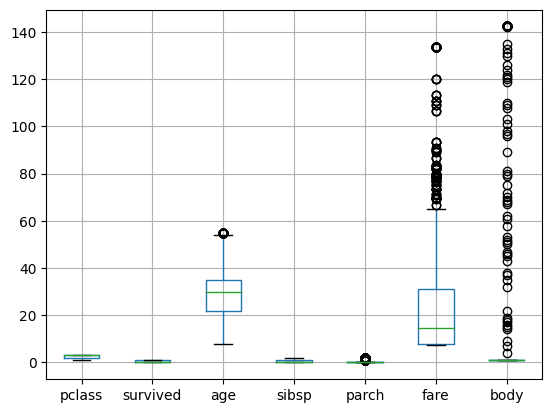

In [25]:
import numpy as np

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Apply the clipping only to numeric columns
df[numeric_cols.columns] = numeric_cols.apply(lambda x: x.clip(lower=x.quantile(0.05), upper=x.quantile(0.95)))

# This will ensure that only numeric columns are processed, avoiding the error

# Boxplot for each numeric column
df.boxplot(column=['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body'])
plt.show()
